# Task-1 Iris Data Set (LGMVIP)

## By:G.Satwika

***importing necessary libraries***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

***importing data set***

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.shape

(150, 5)

In [5]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

***replacing all the names in species with with numbers***

In [6]:
data.replace('Iris-setosa',0,inplace=True)
data.replace('Iris-virginica',1,inplace=True)
data.replace('Iris-versicolor',2,inplace=True)

In [7]:
data['species'].unique()

array([0, 2, 1], dtype=int64)

***checking for null values***

In [8]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

***visualizing iris data***

Text(0.5, 1.0, 'scatter')

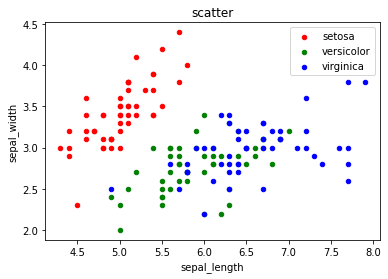

In [9]:
#this is the scatter plot for sepal length and width
ax = data[data.species==0].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='setosa')
data[data.species==2].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='versicolor', ax=ax)
data[data.species==1].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

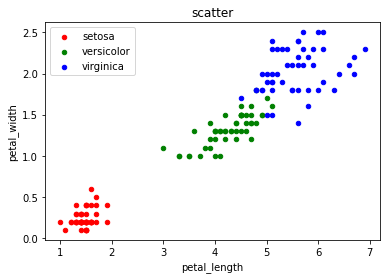

In [10]:
#this is the scatter plot for petal length and width
ax = data[data.species==0].plot.scatter(x='petal_length', y='petal_width', 
                                                    color='red', label='setosa')
data[data.species==2].plot.scatter(x='petal_length', y='petal_width', 
                                                color='green', label='versicolor', ax=ax)
data[data.species==1].plot.scatter(x='petal_length', y='petal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

***splitting the data into data and labels***

In [11]:
X=data.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y=data['species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

***splitting into training and testing data***

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
len(X_train)

120

In [16]:
len(X_test)

30

***training the model***

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [18]:
lr.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
lr.score(X_test,y_test)

0.9666666666666667

***printing accuracy matrix***

In [20]:
actual=y_test
predict=lr.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
confusion_matrix(actual,predict)

array([[ 7,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  9]], dtype=int64)

***classification report***

In [23]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.93      0.96        14
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



***Making a prediction model***

In [24]:
print("enter details")
sepal_length=float(input("sepal_length : "))
sepal_width=float(input("sepal_width : "))
petal_length=float(input("petal_length : "))
petal_width=float(input("petal_width : "))
new_data=np.array([[sepal_length,sepal_width,petal_length,petal_width]])

enter details
sepal_length : 5.1
sepal_width : 3.5
petal_length : 1.4
petal_width : 0.2


In [25]:
ans=lr.predict(new_data)
if(ans==0):
    print("Iris_setosa")
elif(ans==1):
    print("Iris virginica")
else:
    print("Iris versicolor")

Iris_setosa


c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Thus, by using the logistic regression in iris dataset we are getting a accuracy score nearly 97%.